<a href="https://colab.research.google.com/github/pccalegari/exemplos-CN/blob/main/MMQ_naoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mínimos Quadrados não lineares**


As funções usadas na aproximação são não lineares nos parâmetros.

Por exemplo, funções racionais, hiperbólicas, exponenciais, como,

$$g(x) = a_1\exp\left(-\dfrac{(a_2-x)^2}{a_3}\right)+a_4\exp\left(-\dfrac{(a_5-x)^2}{a_6}\right).$$

A ideia continua a mesma, minimizar a soma dos quadrados dos resíduos. A diferença é que podemos ter dois caminhos:


*   Se for possível, podemos linearizar a função aproximadora, resolver o problema linear e depois retornar aos parâmetros originais.
*  Resolver um sistema não linear, obtido a partir do problema de minimizar a função resíduo.

*Exemplo 1:*

1.  Como fazer para aproximar uma função $f$ por uma função $g(x) = a_0\exp(-{a_1x})$?

Note que aplicando $\ln$ em ambos os lados, $g(x) = a_0\exp(-a_1 x) \Longrightarrow \ln(g(x)) = \ln(a_0) - a_1x$. Fazendo $\alpha_0=\ln(a_0)$ e $\alpha_1= - a_1$ temos um problema linear, um ajuste por uma reta, $\ln(y)\approx \alpha_0 + \alpha_1x$. Obtidos $\alpha_0$ e $\alpha_1$ usamos a transformação para obter $a_0$ e $a_1$.






A seguir um exemplo, de MMQ não linear com a resolução de um sistema não linear.

Nosso objetivo, obter os parâmetros por meio do método dos mínimos quadrados, que minimizam a função,

$$  r({\bf a}) = \dfrac{1}{2}\sum_{i=1}^m r_i({\bf a})^2,$$

sendo ${\bf a}=(a_0,a_1,\ldots,a_m)$, o resíduo $r_i({\bf a}) = f(x_i,{\bf a}) - y_i$, com $(x_i,y_i)$ dados e $m$ tamanho dos vetores $x$ e $y$. O nosso obejtivo é determinar ${\bf a}$ tal que o valor da função resíduo seja mínimo.

**Algoritmo de Gauss-Newton**

Nesse método assume-se que ${\bf a}^k$ está próximo do mínimo e portanto, o resíduo $r_i({\bf a})$ está próximo de zero. Para simplificar, vamos apresentar a dedução para uma função com dois parâmetros.

Vamos aproximar a função resíduo $r(a_0,a_1)$ utilizando os três primeiros termos da série de Taylor. Os três primeiros termos da série em torno de $(a_0,a_1)$ com incremento $(p_0,p_1)$ são dados por:
$$r(a_0+p_0,a_1+p_1) \approx r(a_0,a_1) + p_0\dfrac{\partial r}{\partial a_0}(a_0,a_1) + p_1\dfrac{\partial r}{\partial a_1}(a_0,a_1) + \dfrac{1}{2}\left(p_0^2\dfrac{\partial^2 r}{\partial a_0^2}(a_0,a_1)+2p_0p_1\dfrac{\partial^2 r}{\partial a_0\partial a_1}(a_0,a_1)+p_1^2\dfrac{\partial^2 r}{\partial a_1^2}(a_0,a_1)\right).$$

As derivadas parciais em relação a $a_0$ e $a_1$ geram a matriz Jacobiana:

$$J = \left(\begin{array}{cc}
\dfrac{\partial r_1}{\partial a_0} & \dfrac{\partial r_1}{\partial a_1}\\
\dfrac{\partial r_2}{\partial a_0} & \dfrac{\partial r_2}{\partial a_1}\\
\vdots &\vdots \\
\dfrac{\partial r_n}{\partial a_0} & \dfrac{\partial r_n}{\partial a_1} \\
\end{array}\right)$$

Para obter os parâmetros $a_0$ e $a_1$ que minimizam $r(a_0,a_1)$ precisamos derivar  e igualar a zero, obtendo:
$$\dfrac{\partial r}{\partial a_k} = \sum_{i=1}^{n} \dfrac{\partial r_i}{\partial a_k}\cdot r_i$$

Note que,

$$p_0\dfrac{\partial r}{\partial a_0}(a_0,a_1) + p_1\dfrac{\partial r}{\partial a_1}(a_0,a_1) = p^TJ^T r(a)$$

Já os termos de associados as derivadas de segunda ordem são representados por,

$$\dfrac{\partial^2 r}{\partial a_k^2}=\sum_{i=1}^n\dfrac{\partial r_i}{\partial a_k}\cdot\dfrac{\partial r_i}{\partial a_k} + \sum_{i=1}^nr_i\dfrac{\partial^2 r_i}{\partial a_k^2}.$$

Assim,
$$r({\bf a}+{\bf p}) = r({\bf a}) + {\bf p}^TJ^Tr({\bf a}) + \dfrac{1}{2}{\bf p}^T(J^TJ + Q){\bf p}).$$

No processo de minimizar $r$ queremos determinar o incremento ${\bf p}$ que diminua a soma dos resíduos. Ou seja, $r({\bf a}+{\bf p}) < r({\bf a})$. No método de Gauss-Newton, admitimos que ${\bf a}^k$ está pŕoximo do mínimo e portanto $r({\bf a})$ está próximo de zero. Com esta hipótese é razoável argumentar que a matriz $Q$ que contém as derivadas de segunda ordem pode ser desprezada. Nestas condições a cada iteração:

(1) Avaliamos $J$ e $r$.

(2) Resolvemos $J^T J{\bf p} = -J^Tr$

(3) ${\bf a}^{k+1} = {\bf a}^k + {\bf p}$

Para mais detalhes veja [1] e [2].

*Algoritmo*

Entrada: $r_i({\bf a})$, $J$ e ${\bf a}^0$.

Saída: ${\bf a}$


```
itmax = 100
tol = 10**(-6)
it = 1
diff = 1
enquanto(diff > tol e it < itmax) faça
   Calcule r = r(a0)
   Calcule J = J(a0)
   Calcule (J^T)J e (J^T)r
   Resolva o sistema (J^T)Jp = -(J^T)r
   a = a0 + p
   diff = max |a|
   a0 = a
   it = it + 1
   
```

Outra alternativa é o método de **Levenberg-Marquardt** onde a minimização da soma dos resíduos se baseia na solução do sistema:

$$(J_k^TJ_k+\lambda_kI)p_k=-J^T_kr_k,$$
onde $J^T$ é a transposta da matriz Jacobiana e $I$ é a matriz identidade.

Um dos métodos utilizado em least_squares do módulo scipy.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html

**Referências:**

[1] Cálculo Numérico Computacional. Peters e Szeremeta, Ed UFSC, 2018.
[2] Métodos Numéricos. Maria Cristina Cunha, Ed. Unicamp, 1993.





*Exemplo 2*: Uma população de bactérias foi medida ao longo das 6 primeiras horas de um dia.

$$\begin{array}{c|cccccc}
t & 0 & 1 & 2 & 3 & 4 & 5 & 6 \\
\hline
p(t) & 32 & 47 & 65 & 92 & 132 & 190 & 275 \\
\end{array}$$

Utilize a função $g(x) = a_0e^{a_1x}$ para aproximar os dados pelo Método dos Mínimos Quadrados.

*Exercício 1*

Considere a tabela
$$\begin{array}{c|ccccc}
r & 2.7 & 2 & 1.61 & 1.2 & 1.02\\
\hline
\theta & 48^o & 67^o & 83^o & 108^o & 126^o\\
\end{array}$$

gerada a partr de medidas da posição de um cometa em coordenadas polares. Considere que a órbita do cometa é modelada pela lei de Kepler

$$r = \dfrac{a_0}{1-a_1\cos(\theta)}$$

Implemente o método de Gauss-Newton e MMQ linearizado e compare os resultados.

**Aplicação: Curva de polarização**

Para o ajuste da curva de polarização por meio da função não linear é necessário obter os parâmetros ${\bf a}$ da função,
$$ f(x,{\bf a})= a_0 - a_1x - a_2\ln\left(\frac{x}{a_3} + 1\right) - a_4\exp(a_5x).$$

Utilize esta função aproximadora para aproximar os dados de corrente e voltagem da tabela:

$$\begin{array}{c|cccccccc}
i & 0  & 4.75\cdot 10^{-4} & 8.27\cdot 10^{-4} & 1.69\cdot 10^{-3} & 2.5\cdot 10^{-3} & 3.01\cdot 10^{-3} & 3.19\cdot 10^{-3} & 3.86\cdot 10^{-3} \\
\hline
V & 0.6795 & 0.4862 & 0.423 & 0.33975 & 0.25075 & 0.2062 & 0.1629 & 0.07715
\end{array}$$

Parâmetros do ajuste Não linear
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-2.628e-03 -3.319e-03  6.923e-03 -5.406e-03  1.947e-03
               -9.921e-03  1.136e-02 -1.623e-03]
           x: [ 6.394e-02  3.672e-05  5.056e+01  2.628e-03  9.688e+02]
        cost: 0.0001645117796417646
         jac: [[ 0.000e+00  0.000e+00 ... -1.000e+00  0.000e+00]
               [-2.634e+00  1.616e+03 ... -1.584e+00 -1.978e-06]
               ...
               [-4.476e+00  1.721e+03 ... -2.199e+01 -1.843e-04]
               [-4.664e+00  1.724e+03 ... -4.208e+01 -4.268e-04]]
        grad: [-6.906e-08  3.285e-05 -4.307e-11 -3.593e-07  1.540e-11]
  optimality: 3.2852787484216606e-05
 active_mask: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
        nfev: 58
        njev: 49
a =  [6.39403286e-02 3.67245704e-05 5.05566944e+01 2.62798665e-03
 9.68782079e+02]


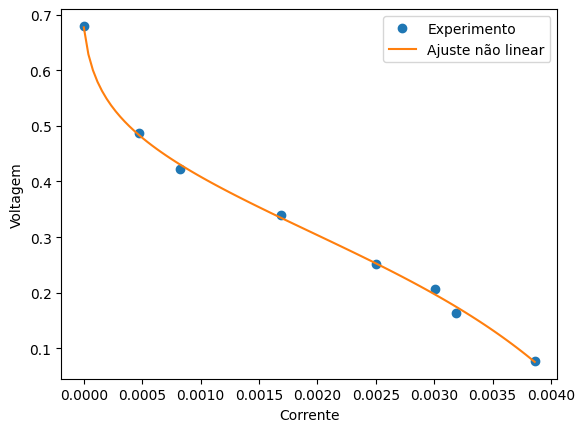

In [3]:
#Exemplo curva de polarização, usando o módulo scipy

import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

def fnlinear(x, a):
    y = 0.6795 - a[0]*np.log(x/a[1] + 1.0) - a[2]*x- a[3]*np.exp(a[4]*x)
    return y

def flinear(t, a, b):
    y = a - b*t
    return y

def rnlinear(a, x, y):
    return 0.6795 - a[0]*np.log(x/a[1] + 1.0) - a[2]*x - a[3]*np.exp(a[4]*x) - y

def rlinear(x, t, y):
    return x[0] - x[1]*t - y

i = np.array([0, 4.75*10**(-4), 8.27*10**(-4), 1.69*10**(-3), 2.5*10**(-3), 3.01*10**(-3), 3.19*10**(-3), 3.86*10**(-3)])
n = len(i)
v = np.array([0.6795, 0.4862, 0.423, 0.33975, 0.25075, 0.2062, 0.1629, 0.07715])

i_min = i[0]
i_max = i[n-1]

x0 = np.array([0.0, 0.1, 1, 0.0, 500.0])

res_lsq = optimize.least_squares(rnlinear, x0, args=(i, v))

print("Parâmetros do ajuste Não linear")
print(res_lsq)
a = np.zeros(len(x0))
for k in range(len(x0)):
    a[k] = res_lsq.x[k]

print("a = ", a)

i_test = np.linspace(i_min, i_max, 100)

y_lsq = fnlinear(i_test, a)


plt.figure(2)
plt.plot(i, v, 'o', label='Experimento')
plt.plot(i_test, y_lsq, label='Ajuste não linear')
plt.xlabel("Corrente")
plt.ylabel("Voltagem")
plt.legend()
plt.show()